In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


def plot_data(x, t):
    plt.scatter(x, t, marker='o', c="k", s=10)  #plots any given data


def plot_truth(x, y, label='Truth'):
    plt.plot(x, y, 'k--', label=label)  #for plotting the truth


def plot_predictive(x, y, std, y_label='Prediction', std_label='Uncertainty', plot_xy_labels=True):  #plots the best pridiction with the available data
    y = y.ravel()
    std = std.ravel()

    plt.plot(x, y, label=y_label)
    plt.fill_between(x.ravel(), y + std, y - std, alpha = 0.5,label=std_label)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')


def plot_posterior_samples(x, ys, plot_xy_labels=True): #plots posterir for samples
    plt.plot(x, ys[:, 0], 'r-', alpha=0.1, label='Post. samples')
    for i in range(1, ys.shape[1]):
        plt.plot(x, ys[:, i], 'r-', alpha=0.1)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')


In [2]:
import numpy as np
import pandas as pd

def posterior(Phi, t, alpha, beta, return_inverse=False):
    """Computes mean and covariance matrix of the posterior distribution.""" 
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)

    if return_inverse:
        return m_N, S_N, S_N_inv
    else:
        return m_N, S_N


def posterior_predictive(Phi_test, m_N, S_N, beta):
    """Computes mean and variances of the posterior predictive distribution."""
    y = Phi_test.dot(m_N)
    # Only compute variances (diagonal elements of covariance matrix)
    y_var = 1 / beta + np.sum(Phi_test.dot(S_N) * Phi_test, axis=1)
    
    return y, y_var
  
def f(X, noise_variance):
    '''Linear function plus noise'''
    return f_w0 + f_w1 * X + noise(X.shape, noise_variance)

def noise(size, variance):
    return np.random.normal(scale=np.sqrt(variance), size=size)

def identity_basis_function(x):
    return x

def expand(x, bf, bf_args=None):
    if bf_args is None:
        ret = np.ones((len(x),2))
        ret[:,1] = x
        return ret
    else:
        return ret

In [3]:
#from bayesian_linear_regression_util import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv('BostonHousing.csv.txt') #importing data
data.corr()['medv'].sort_values() #checking correlational values

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [4]:
data=data.to_numpy()
t=data[:,13]
t=np.reshape(t,(506,1))
phi=np.ones((506,2))
phi[:,1] = data[:,5]
w_ml=(np.linalg.inv(phi.T.dot(phi))).dot(phi.T).dot(t) #mle
f_w0=w_ml[0]
f_w1=w_ml[1]

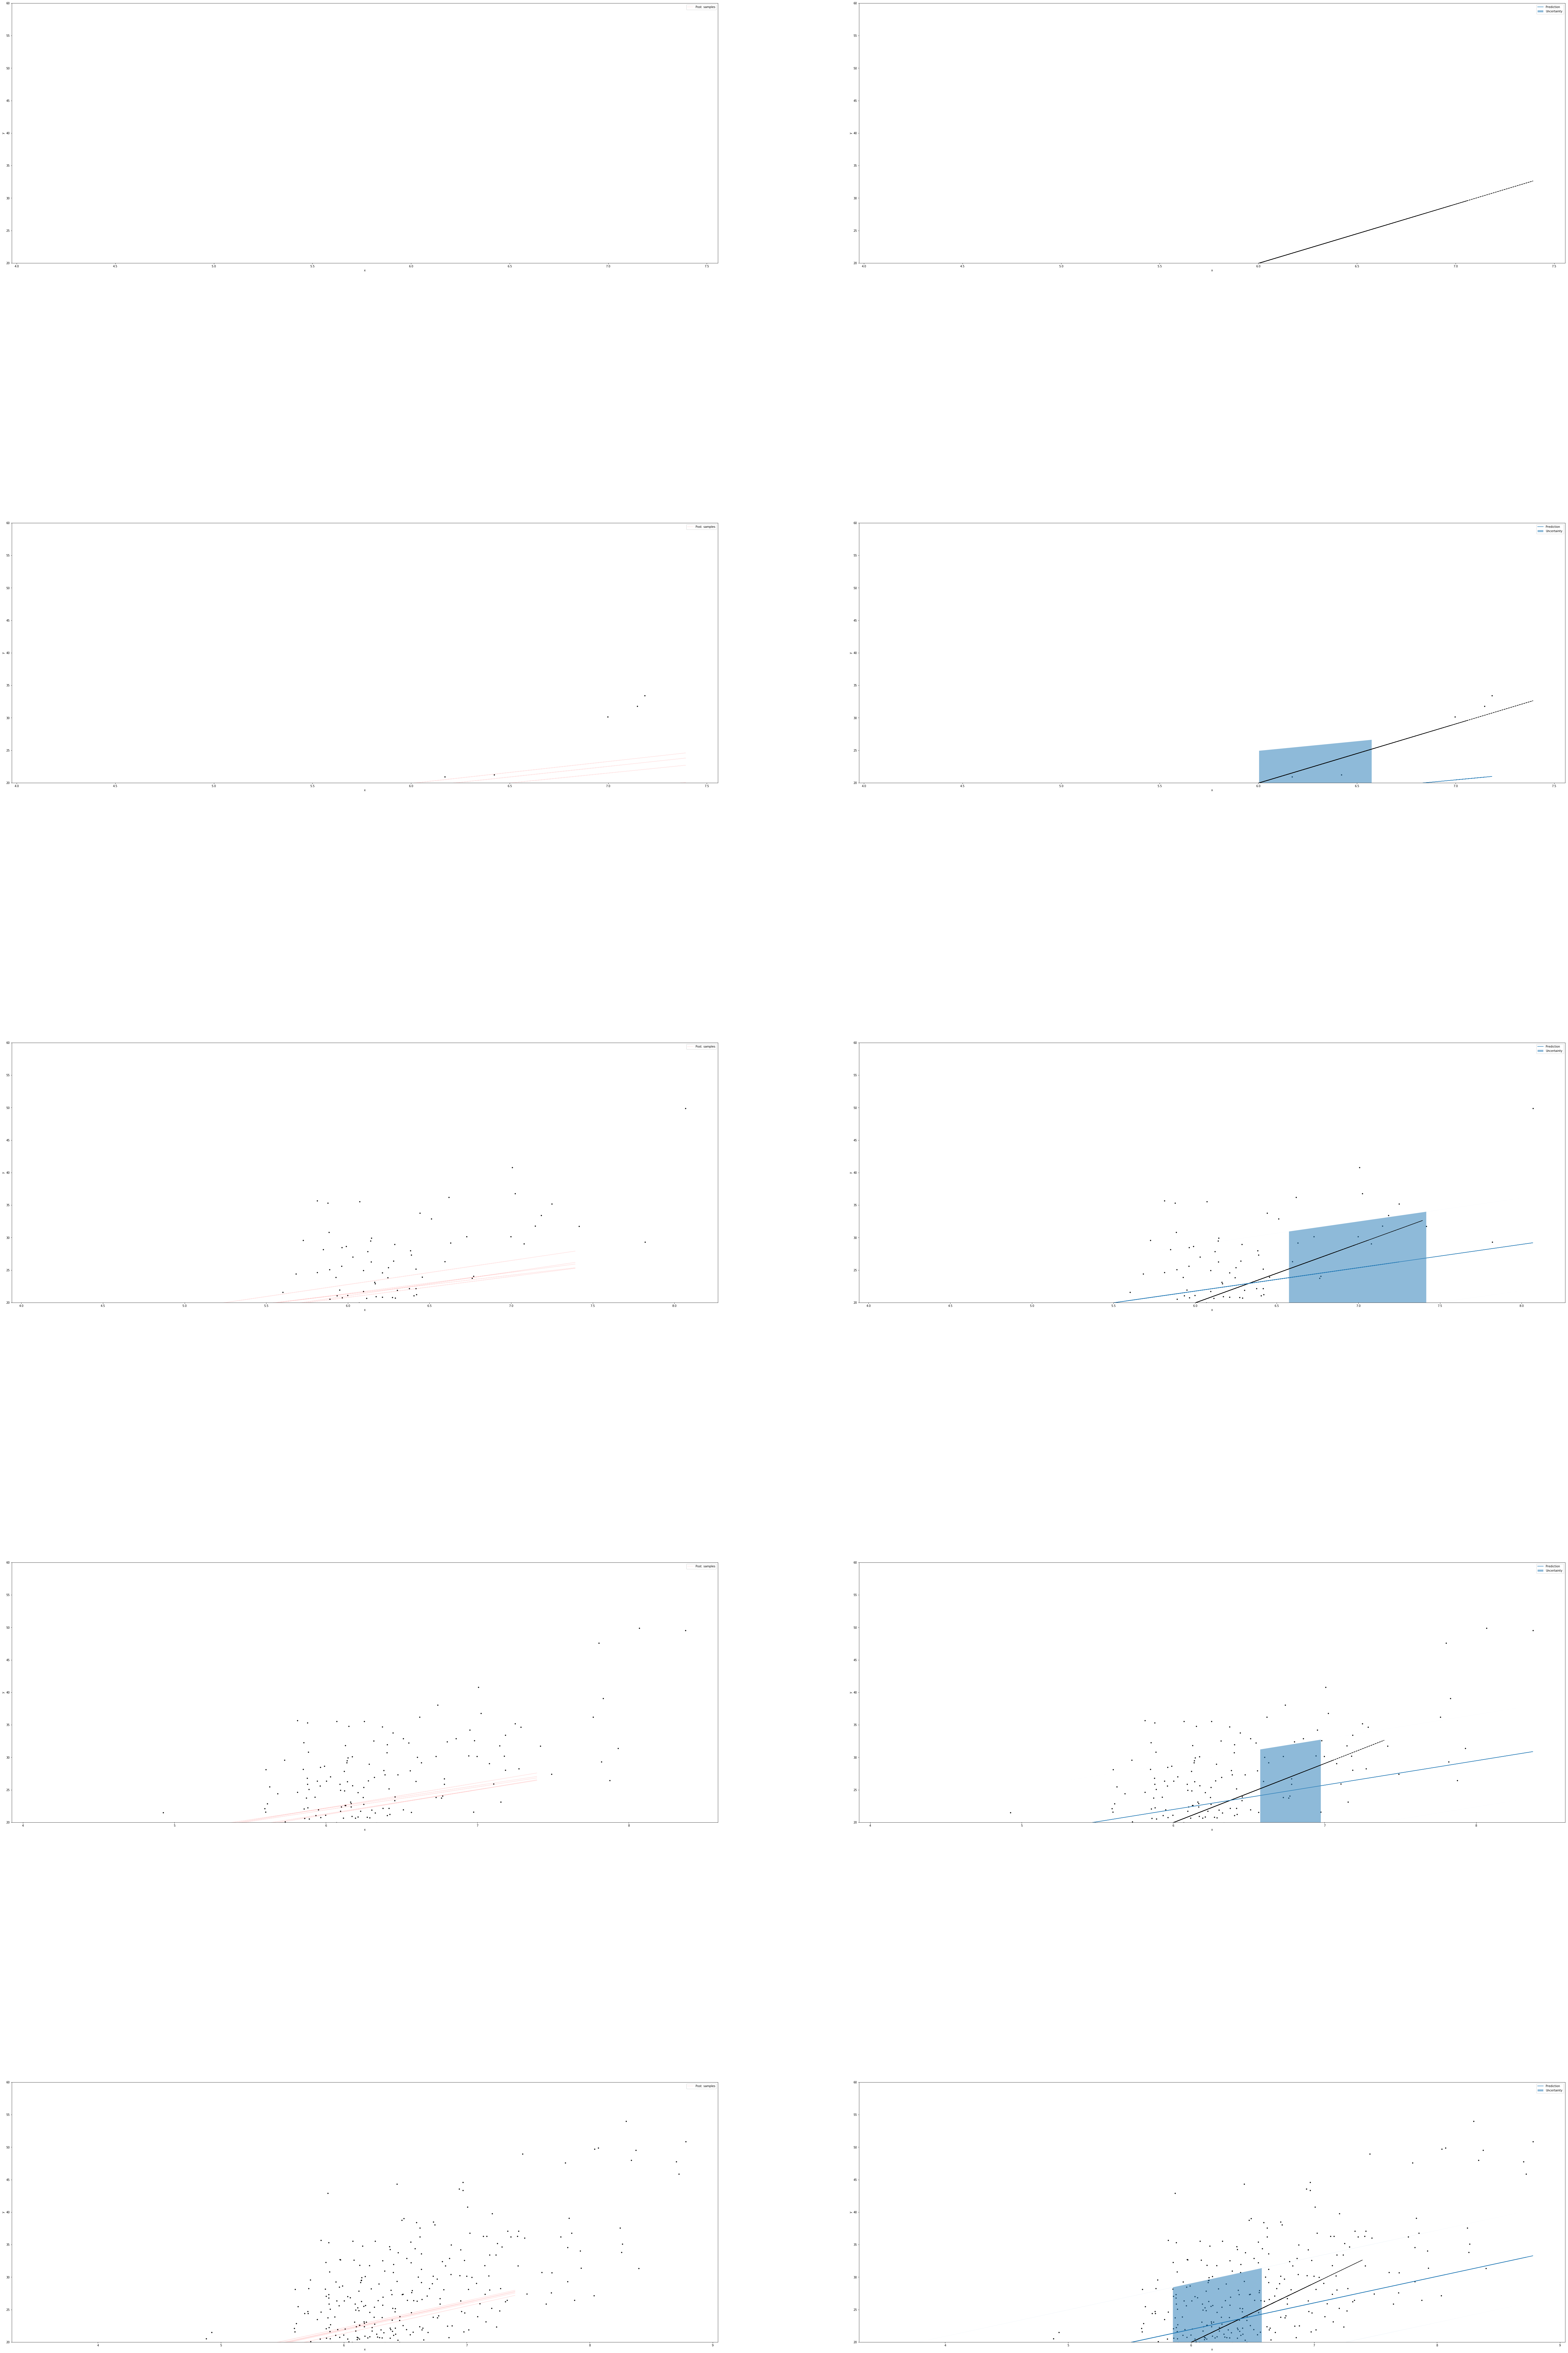

In [8]:
# Training dataset sizes
N_list = [1,10,100,200,400]

beta = 0.02
alpha = 0.1

# Training observations in data wrt rm
X = data[0:400,5]
# Training target values
t = f(X, noise_variance=1/beta)

# Test observations
X_test = data[401:506,5]
u=data[401:506,13]
# Function values without noise 
y_true = f(X_test, noise_variance=0)
    
# Design matrix of test observations
Phi_test = expand(X_test, identity_basis_function)

plt.figure(figsize=(150, 150))
plt.subplots_adjust(hspace=1)

for i, N in enumerate(N_list):
    X_N = X[:N]
    t_N = t[:N]

    # Design matrix of training observations
    Phi_N = expand(X_N, identity_basis_function)
    
    # Mean and covariance matrix of posterior
    m_N, S_N = posterior(Phi_N, t_N, alpha, beta)
    
    # Mean and variances of posterior predictive 
    y, y_var = posterior_predictive(Phi_N, m_N, S_N, beta)
    
    # Draw 5 random weight samples from posterior and compute y values
    w_samples = np.random.multivariate_normal(m_N.ravel(), S_N, 5).T
    y_samples = Phi_test.dot(w_samples)

    plt.subplot(len(N_list), 3, i * 3 + 2)
    plot_data(X_N, t_N)
    #plot_truth(X_test, y)
    plot_posterior_samples(X_test, y_samples)
    plt.ylim(20,60)
    plt.legend()

    plt.subplot(len(N_list), 3, i * 3 + 3)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true, label=None)
    plot_predictive(X_N, y, np.sqrt(y_var))
    plt.ylim(20, 60)
    plt.legend()

In [10]:
s=0
for i in range(105):
    s=s+(u[i]-X_test[i])**2
s=np.sqrt(s/106)
print(s)

10.963268223550376
